In [7]:
import pandas as pd

merged_results = pd.read_excel('all_merged_data.xlsx')

In [8]:
phenotype_mask = merged_results['Gene'].isin(['YALI0_D20482g', 'YALI0_F05896g', 'YALI0_E13948g'])
phenotype = merged_results[phenotype_mask]

'''phenotype["order"] = phenotype.iloc[:, 4:13].mean(axis=1)
phenotype = phenotype.sort_values(by='order')'''

print(phenotype)


     Unnamed: 0           Gene TF number Assigned name  scSoA  scYFP  inYFP  \
0             0  YALI0_D20482g     TF037          GZF1  -4.20  -0.67    0.0   
40           40  YALI0_F05896g     TF128          DEP1   0.31   0.00    0.0   
108         108  YALI0_E13948g     TF068          HSF1   0.00   0.00    0.0   

     scTlG  HAC_scYFP  OE_inRedStar  OE_normalized_inRedStar  KO_inRedStar  \
0      0.0        0.0      1.762627                 1.772074      2.478464   
40     0.0        0.0      0.157552                 0.155328      2.565329   
108    0.0        0.0      1.654486                 1.662111      1.990339   

     KO_normalized_inRedStar  
0                   1.938628  
40                  2.256444  
108                 1.654634  


In [9]:
phenotype['sum'] = phenotype['OE_inRedStar'] + phenotype['OE_normalized_inRedStar'] + phenotype['KO_inRedStar'] + phenotype['KO_normalized_inRedStar']
phenotype = phenotype.sort_values(by=['sum'])
print(phenotype)

     Unnamed: 0           Gene TF number Assigned name  scSoA  scYFP  inYFP  \
40           40  YALI0_F05896g     TF128          DEP1   0.31   0.00    0.0   
108         108  YALI0_E13948g     TF068          HSF1   0.00   0.00    0.0   
0             0  YALI0_D20482g     TF037          GZF1  -4.20  -0.67    0.0   

     scTlG  HAC_scYFP  OE_inRedStar  OE_normalized_inRedStar  KO_inRedStar  \
40     0.0        0.0      0.157552                 0.155328      2.565329   
108    0.0        0.0      1.654486                 1.662111      1.990339   
0      0.0        0.0      1.762627                 1.772074      2.478464   

     KO_normalized_inRedStar       sum  
40                  2.256444  5.134653  
108                 1.654634  6.961570  
0                   1.938628  7.951793  


C:\Users\User\AppData\Local\Temp\ipykernel_14720\1689014500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phenotype['sum'] = phenotype['OE_inRedStar'] + phenotype['OE_normalized_inRedStar'] + phenotype['KO_inRedStar'] + phenotype['KO_normalized_inRedStar']


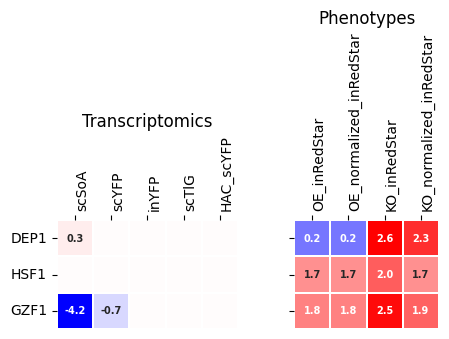

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


# Define the numeric data and row labels
numeric_data1 = phenotype.iloc[:, 4:9]
numeric_data2 = phenotype.iloc[:, 9:13]

row_labels = [gene if assigned_name == '-' else assigned_name 
              for assigned_name, gene in zip(phenotype['Assigned name'], phenotype['Gene'])]

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

annot_kws = {"size": 7, "weight": "bold"}


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 3), sharey=True)

# Plot the first heatmap
annot_data1 = numeric_data1.map(lambda x: f'{x:.1f}' if x != 0 else '')

# Create a blank annotation matrix for numeric_data2
annot_data2 = pd.DataFrame('', index=numeric_data2.index, columns=numeric_data2.columns)

# Specify annotations for chosen variants
annotations2 = {
    'OE_inRedStar': ['TF003', 'TF037', 'TF068', 'TF119', 'TF121', 'TF124', 'TF126', 'TF128'],
    'OE_normalized_inRedStar': ['TF037', 'TF068', 'TF121', 'TF124', 'TF126', 'TF128'],
    'KO_inRedStar': ['TF033', 'TF037', 'TF054', 'TF068', 'TF080', 'TF120', 'TF128'],
    'KO_normalized_inRedStar': ['TF033', 'TF037', 'TF054', 'TF068', 'TF120', 'TF128']
}

# Add annotations based on specified genes
for column, genes in annotations2.items():
    for gene in genes:
        if gene in phenotype['TF number'].values:
            annot_data2.loc[phenotype['TF number'] == gene, column] = numeric_data2.loc[phenotype['TF number'] == gene, column].apply(lambda x: f'{x:.1f}')


sns.heatmap(numeric_data1, ax=ax1, xticklabels=True, yticklabels=row_labels, cmap=cmap, center=0, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data1, fmt='', annot_kws=annot_kws)
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, xticklabels=True, yticklabels=row_labels, cmap=cmap, center=1, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data2, fmt='', annot_kws=annot_kws)
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')


# Adjust the layout
plt.tight_layout()
#plt.savefig('subheatmap_phenotype.png')
